In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [6]:
try:
    df = pd.read_csv('/content/Sample - Superstore.csv', encoding='latin-1')
except UnicodeDecodeError:
    try:
        df = pd.read_csv('/content/Sample - Superstore.csv', encoding='ISO-8859-1')
    except UnicodeDecodeError:
        print("Could not decode the file with 'latin-1' or 'ISO-8859-1'. You may need to determine the correct encoding of the CSV file.")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [7]:
df.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [8]:
print(df.isnull().sum())

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64


In [9]:
print(df.dtypes)

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code        int64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
Quantity           int64
Discount         float64
Profit           float64
dtype: object


In [10]:
# Group data by region and sum sales
region_sales = df.groupby('Region')['Sales'].sum().reset_index()

<ipython-input-11-209d8e097552>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Sales',data=df , palette='inferno')


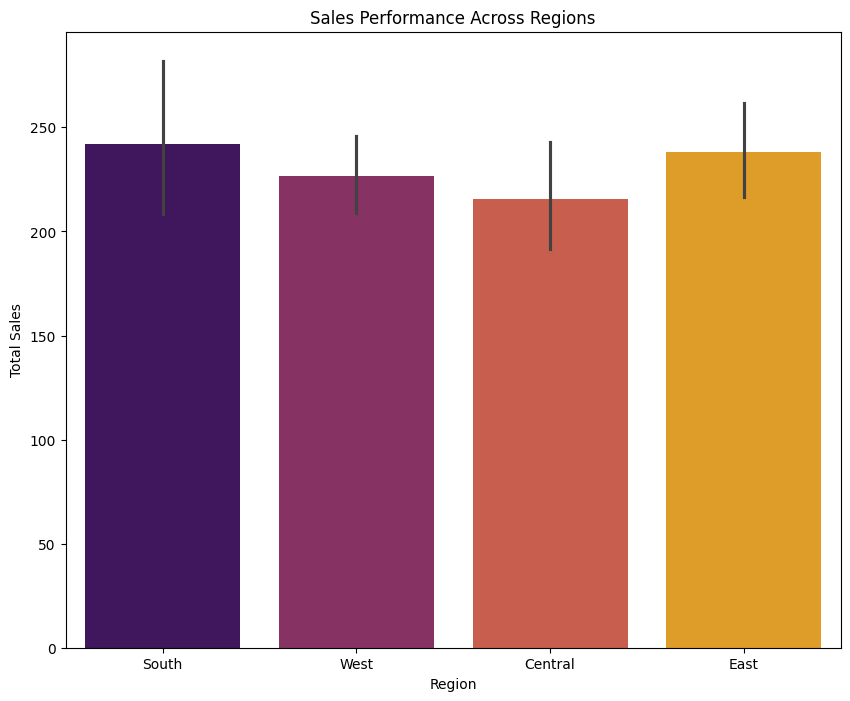

In [11]:
#plot sales by region
plt.figure(figsize=(10,8))
sns.barplot(x='Region', y='Sales',data=df , palette='inferno')
plt.title('Sales Performance Across Regions')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.show()

In [13]:
# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create 'YearMonth' column
df['YearMonth'] = df['Order Date'].dt.to_period('M').astype(str)

# Group data by 'YearMonth' and sum 'Sales'
monthly_sales = df.groupby('YearMonth')['Sales'].sum().reset_index()

# Ensure 'Sales' is numeric
monthly_sales['Sales'] = pd.to_numeric(monthly_sales['Sales'], errors='coerce')

# Drop any rows where 'Sales' could not be converted to numeric
monthly_sales.dropna(subset=['Sales'], inplace=True)

# Convert 'Sales' to float
monthly_sales['Sales'] = monthly_sales['Sales'].astype(float)

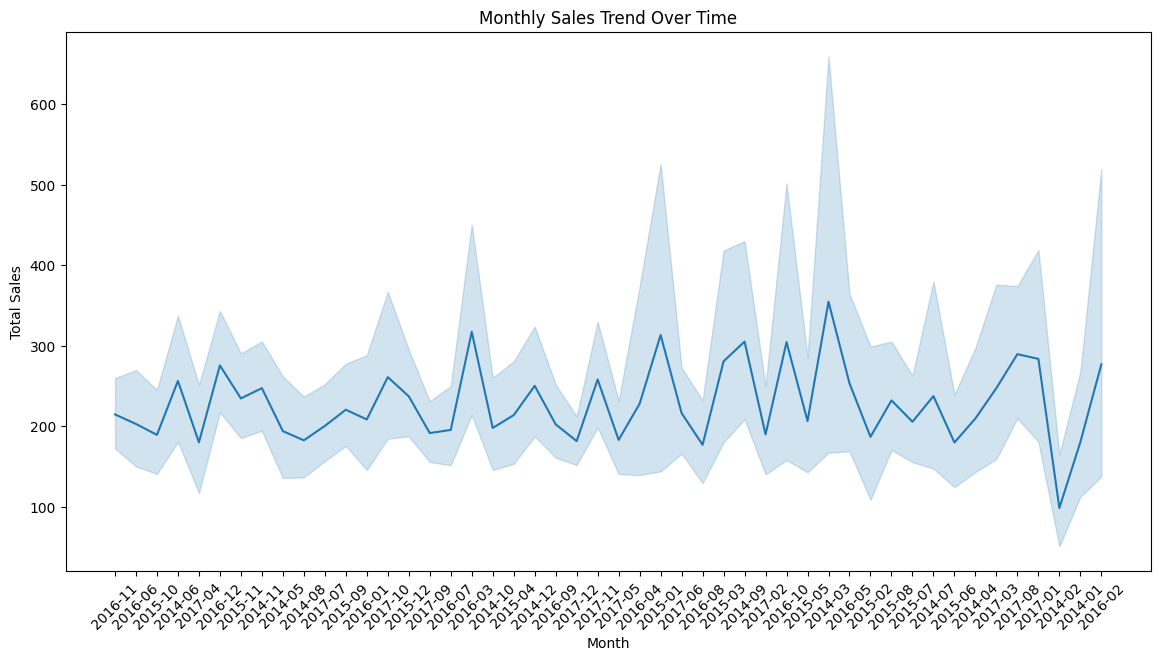

In [14]:
# Plot sales trend over time
plt.figure(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Sales', data=df)
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

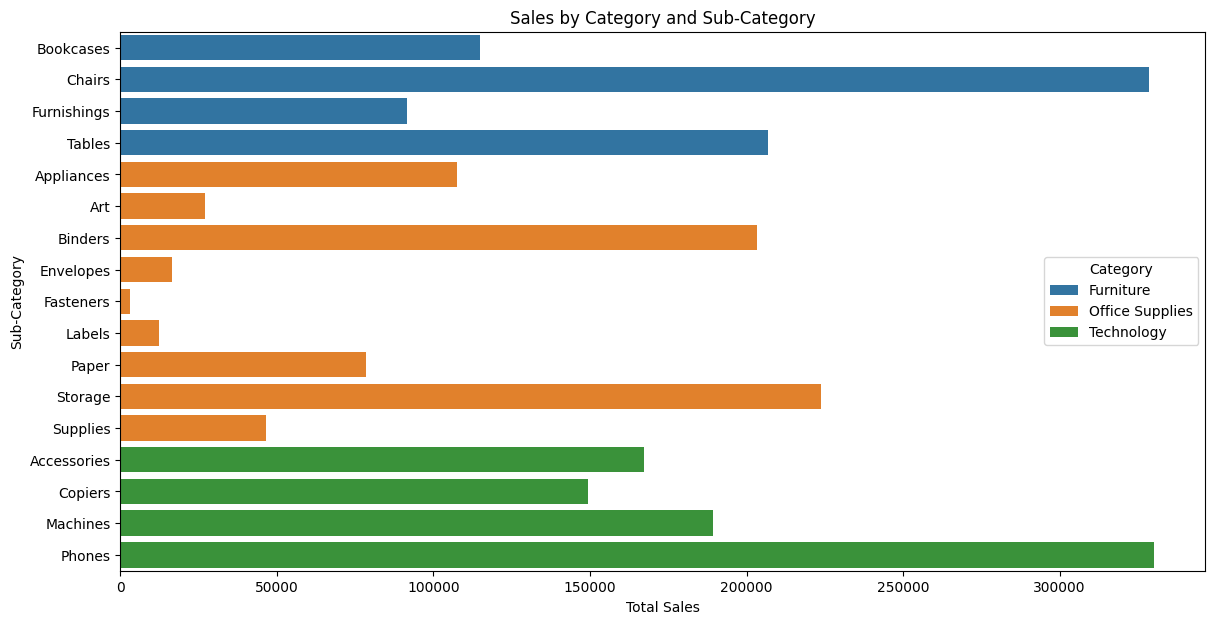

In [15]:
# Group data by Category and Sub-Category and sum sales
category_sales = df.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index()

# Plot sales by Category and Sub-Category
plt.figure(figsize=(14, 7))
sns.barplot(x='Sales', y='Sub-Category', hue='Category', data=category_sales)
plt.title('Sales by Category and Sub-Category')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.legend(title='Category')
plt.show()

<ipython-input-16-003e44b4b742>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette = "Accent")


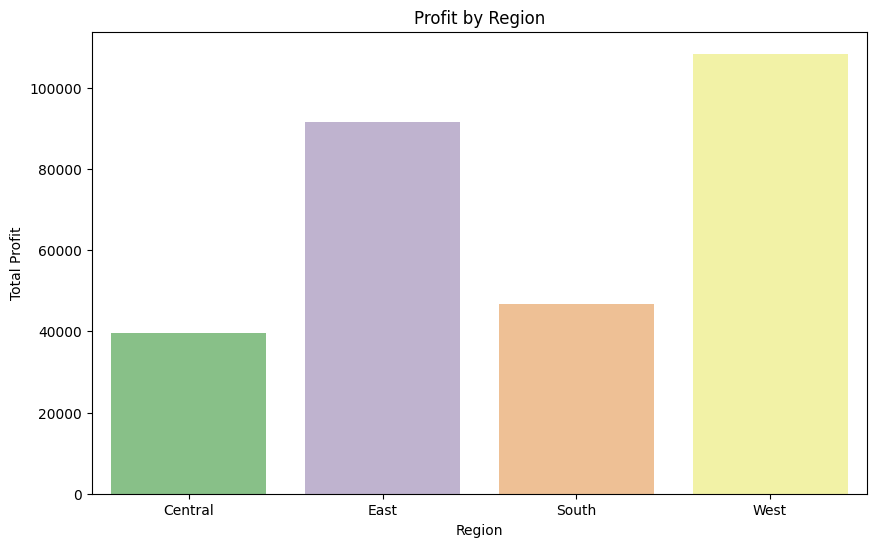

In [16]:
# Group data by region and sum profit
region_profit = df.groupby('Region')['Profit'].sum().reset_index()

# Plot profit by region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit, palette = "Accent")
plt.title('Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

<ipython-input-17-4c5daf6869ba>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Sales', data=segment_sales_profit , palette = 'inferno')


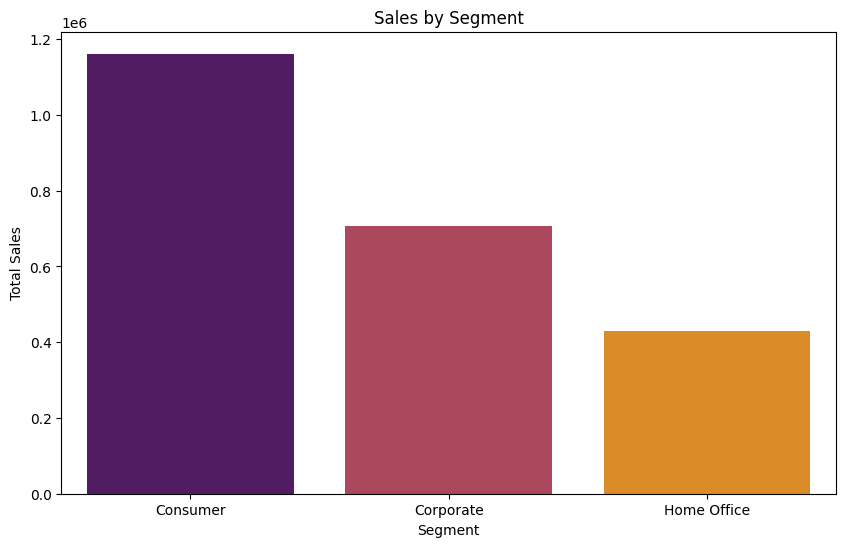

In [17]:
# Group data by segment and sum sales and profit
segment_sales_profit = df.groupby('Segment').agg({'Sales': 'sum', 'Profit': 'sum'}).reset_index()

# Plot sales by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Sales', data=segment_sales_profit , palette = 'inferno')
plt.title('Sales by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Sales')
plt.show()

<ipython-input-18-f60745367956>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette = 'Accent')


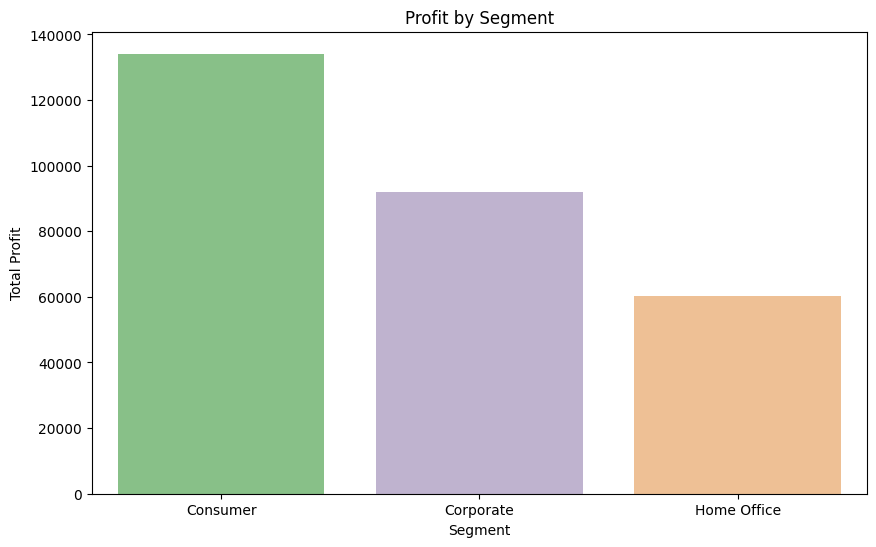

In [18]:
# Plot profit by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='Segment', y='Profit', data=segment_sales_profit, palette = 'Accent')
plt.title('Profit by Segment')
plt.xlabel('Segment')
plt.ylabel('Total Profit')
plt.show()

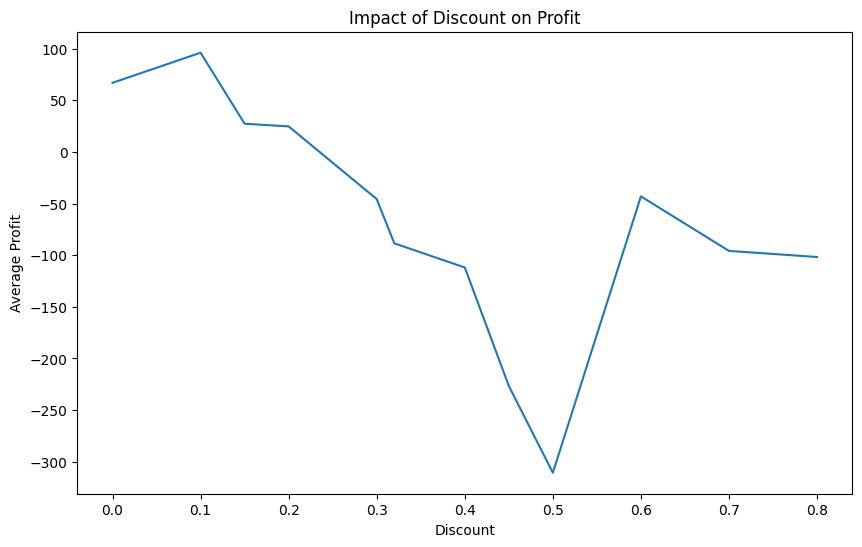

In [19]:
# Group data by discount and calculate average profit
discount_profit = df.groupby('Discount')['Profit'].mean().reset_index()

# Plot profit by discount
plt.figure(figsize=(10, 6))
sns.lineplot(x='Discount', y='Profit', data=discount_profit)
plt.title('Impact of Discount on Profit')
plt.xlabel('Discount')
plt.ylabel('Average Profit')
plt.show()

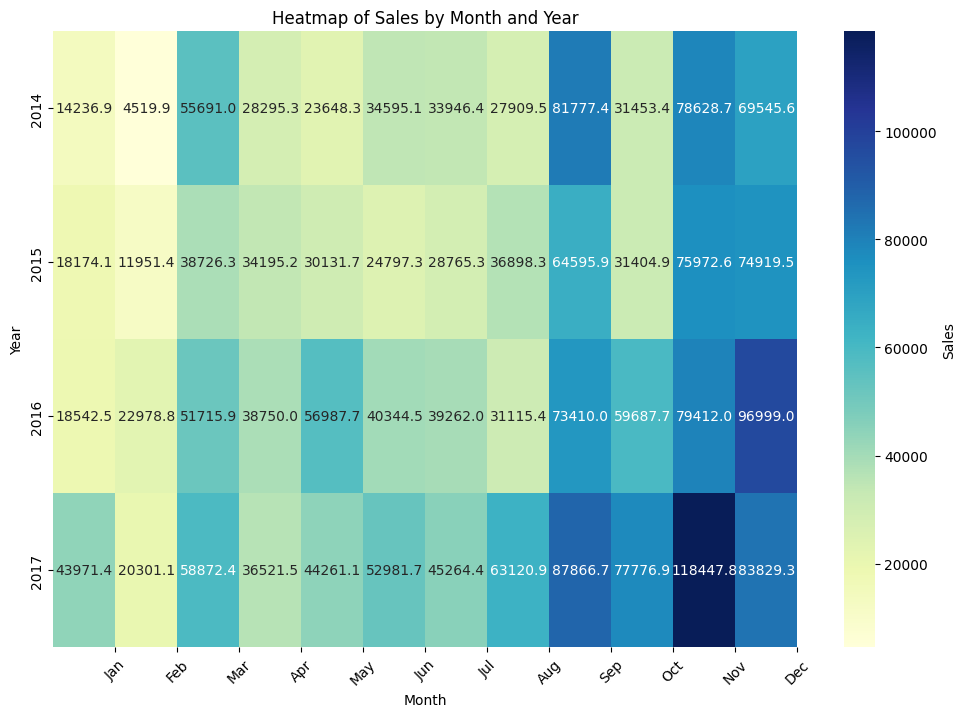

In [20]:
import calendar

# Extract year and month
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

# Group data by year and month and sum sales
year_month_sales = df.groupby(['Year', 'Month'])['Sales'].sum().unstack()

# Plot heatmap of sales by month and year
plt.figure(figsize=(12, 8))
sns.heatmap(year_month_sales, annot=True, fmt=".1f", cmap="YlGnBu", cbar_kws={'label': 'Sales'})
plt.title('Heatmap of Sales by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=45)
plt.show()

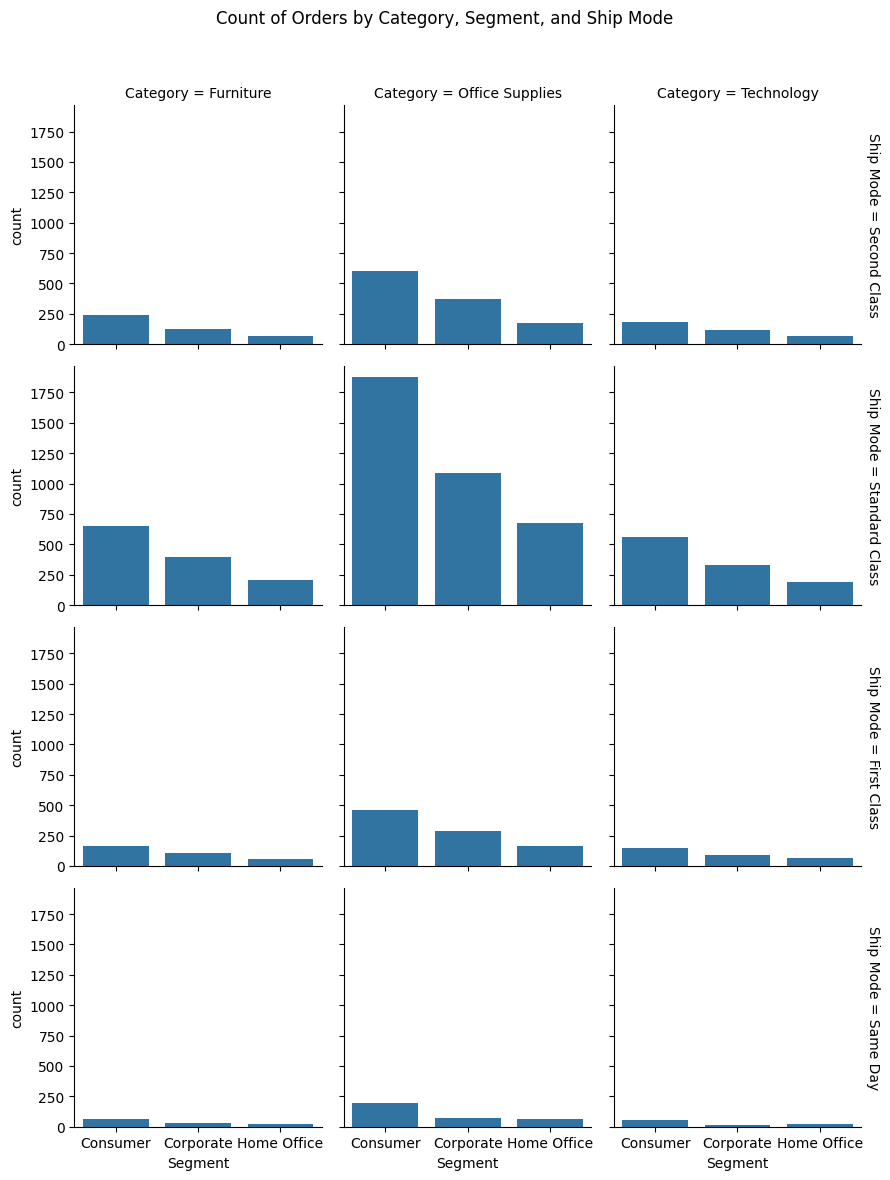

In [21]:
# Create a FacetGrid for Category and Ship Mode
g = sns.FacetGrid(df, col="Category", row="Ship Mode", margin_titles=True)
g.map(sns.countplot, "Segment", order=df['Segment'].value_counts().index)

# Add titles
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Count of Orders by Category, Segment, and Ship Mode')

# Show the plot
plt.show()